# Task 3.4 Construct Basic Quantum Circuits

## Objective 1 : Circuit

* Abstract circuit, which is defined in terms of virtual qubits and arbitrary high-level operations, like encapsulated algorithms and user-defined gates.
* physical circuit, which is defined in terms of the hardware qubits of one particular backend, and contains only operations that this backend natively supports. You might also see this concept referred to as an ISA circuit.

### Api OVerview

* Bit --> Qubit , Clbit, AncillaQubit
* Register --> QuantumRegister , ClassicalRegister , AncillaRegister
* CircuitInstruction --> Operation 
* Operation --> Instruction, Gate
* Instruction --> Barrier, Delay, Measure, Reset , ControlFlowOp
* ControlFlowOp --> BreakLoopOp, ContinueLoopOp, BoxOp, ForLoopOp, IfElseOp, SwitchCaseOp, WhileLoopOp

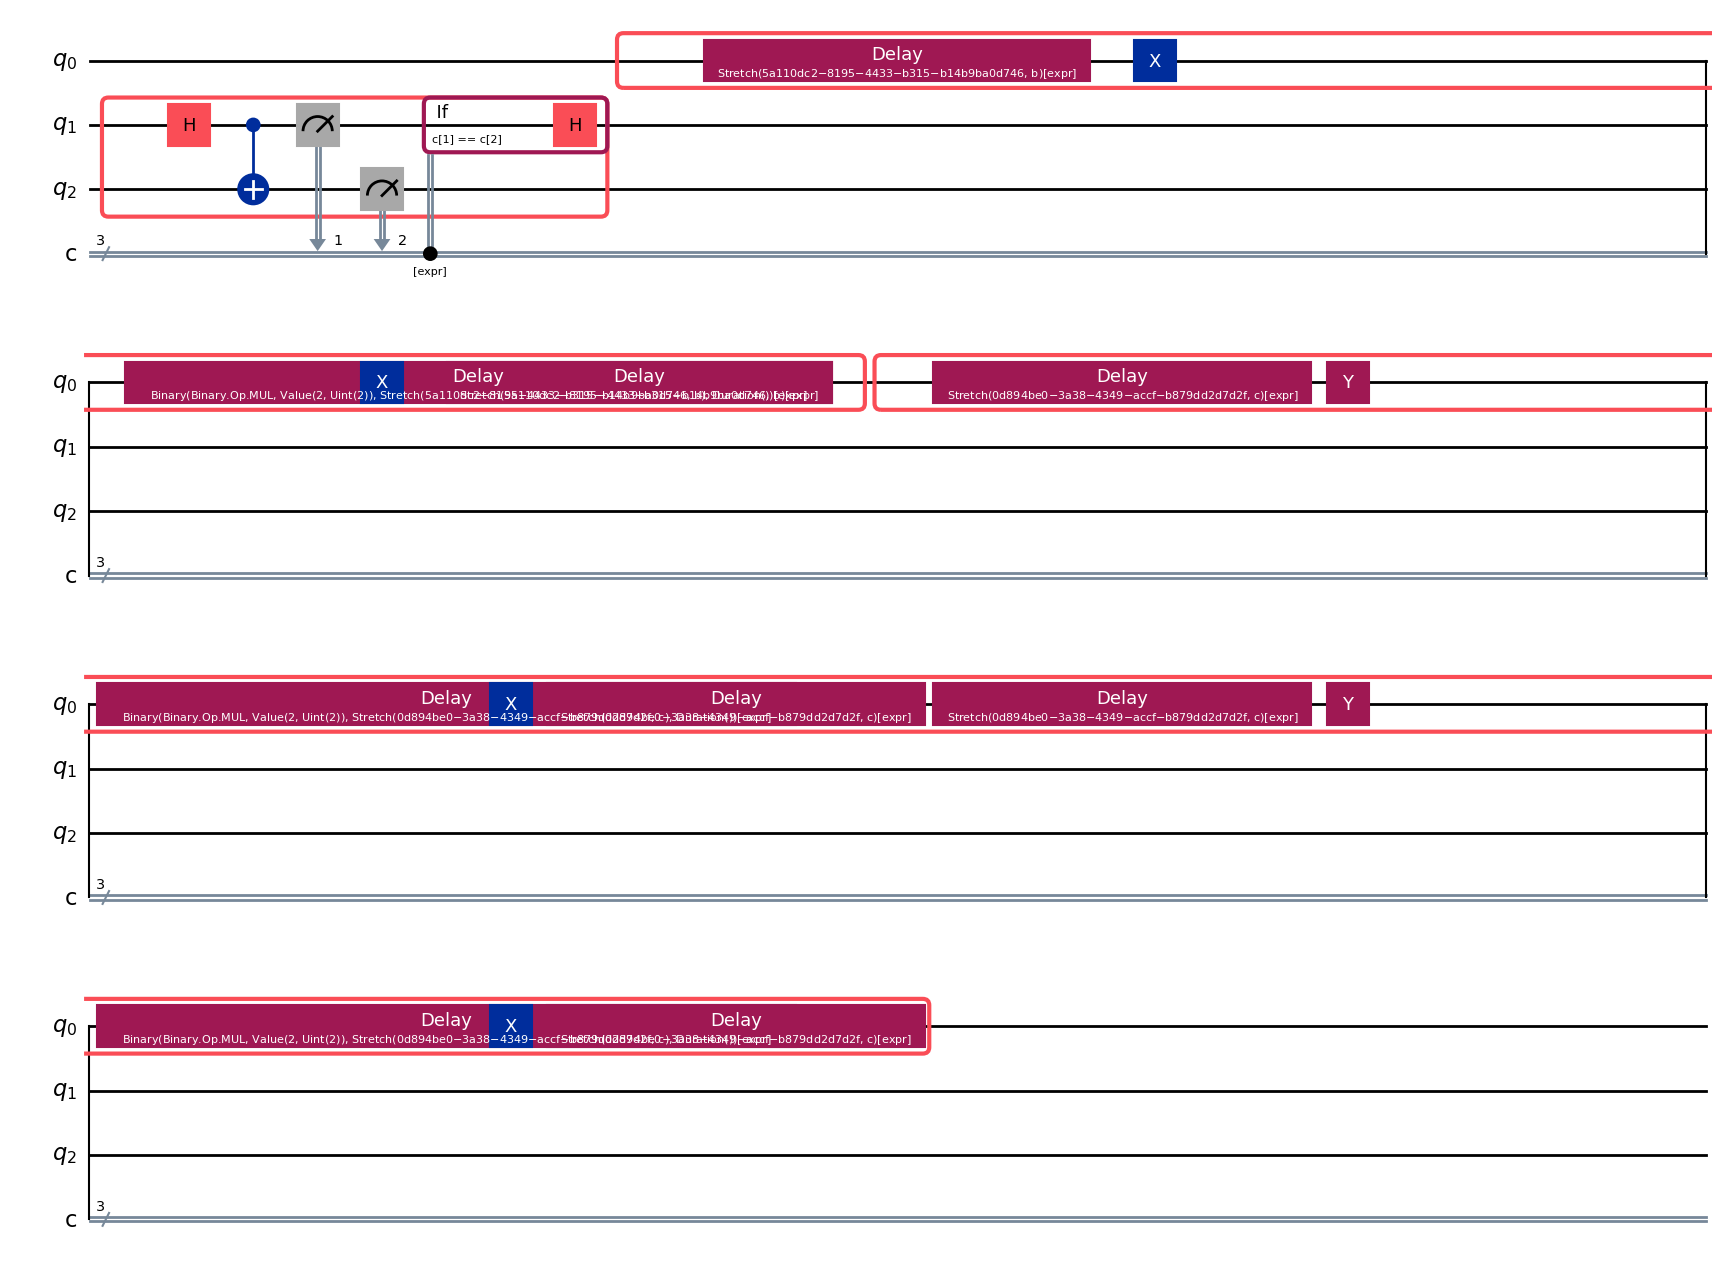

In [4]:
from qiskit import QuantumCircuit
from qiskit.circuit.classical import expr
 
qc = QuantumCircuit(3, 3)
# This sets up three duration "degrees of freedom" that will
# be resolved later by a backend compiler.
a = qc.add_stretch("a")
b = qc.add_stretch("b")
c = qc.add_stretch("c")
 
# This set of operations involves feed-forward operations that
# Qiskit cannot know the length of.
with qc.box():
    qc.h(1)
    qc.cx(1, 2)
    qc.measure([1, 2], [1, 2])
    with qc.if_test(expr.equal(qc.clbits[1], qc.clbits[2])):
        qc.h(1)
 
# While that stuff is happening to qubits (1, 2), we want
# qubit 0 to do two different DD sequences.  The two DD
# sequences are fixed to be the same length as each other,
# even though they're both internally stretchy.
with qc.box(duration=a):
    # Textbook NMRish XX DD.
    qc.delay(b, 0)
    qc.x(0)
    qc.delay(expr.mul(2, b), 0)
    qc.x(0)
    qc.delay(b, 0)
with qc.box(duration=a):
    # XY4-like DD.
    for _ in range(2):
        qc.delay(c, 0)
        qc.y(0)
        qc.delay(expr.mul(2, c), 0)
        qc.x(0)
        qc.delay(c, 0)

qc.draw('mpl')

### Creating Instruction SubClasses

In [5]:
import math
import numpy as np
from qiskit.circuit import Gate, QuantumCircuit
 
class RXZGate(Gate):
    def __init__(self, theta):
        # Initialize with our name, number of qubits and parameters.
        super().__init__("rxz", 2, [theta])
 
    def _define(self):
        # Our base definition is an RZXGate, applied "backwards".
        defn = QuantumCircuit(2)
        defn.rzx(1, 0)
        self._definition = defn
 
    def inverse(self, annotated = False):
        # We have an efficient representation of our inverse,
        # so we'll override this method.
        return RXZGate(-self.params[0])
 
    def power(self, exponent: float):
        # Also we have an efficient representation of power.
        return RXZGate(exponent * self.params[0])
 
    def __array__(self, dtype=None, copy=None):
        if copy is False:
            raise ValueError("unable to avoid copy while creating an array as requested")
        cos = math.cos(0.5 * self.params[0])
        isin = 1j * math.sin(0.5 * self.params[0])
        return np.array([
            [cos, -isin, 0, 0],
            [-isin, cos, 0, 0],
            [0, 0, cos, isin],
            [0, 0, isin, cos],
        ], dtype=dtype)

In [7]:
from qiskit.circuit import SessionEquivalenceLibrary, Parameter
 
theta = Parameter("theta")
 
equiv = QuantumCircuit(2)
equiv.h(0)
equiv.cx(1, 0)
equiv.rz(theta, 0)
equiv.cx(1, 0)
equiv.h(0)
 
SessionEquivalenceLibrary.add_equivalence(RXZGate(theta), equiv)

### Converting Abstract Circtuits to physical Circuits

* qiskit transpiler
* generate_preset_pass_manager

### Simulating Circuits

* BasicProvider
* StateVectorSimulator
* qiskit_aer
* StateVectorSampler
* StateVectorEstimator

### Apply Pauli twirling to a circuit

quantum error suppression technique that uses randomization to shape coherent error into stochastic errors by combining the results from many random, but logically equivalent circuits

pauli_twirl_2q_gates

## Objective 2: Quantum Circuit

View Quantum Circuit Part in section 1.2 